In [1]:
from functions.data_functions import save_pickle, load_pickle, load_data
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import arviz as az

In [2]:
models_summary = load_pickle('saved_models')
fitted_models = load_pickle('fitted_models')
pca_df = load_data('BEACON', 'pca_df')

In [3]:
comp = ['comp_1', 'comp_2','comp_3']
variables = ['Intercept', 'group', 'variable', 'group:variable']

In [4]:
az.summary(fitted_models['alt']['comp_1'], var_names=variables, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,0.625,5.157,-10.691,10.507
group[HC],-2.612,6.822,-14.493,12.903
variable[t2],-0.064,5.209,-10.164,10.979
"group:variable[HC, t2]",0.563,7.791,-16.364,15.750


In [5]:
az.summary(fitted_models['alt']['comp_2'], var_names=variables, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,-0.030,2.078,-4.442,4.241
group[HC],0.076,2.776,-5.428,5.978
variable[t2],0.058,2.291,-4.926,4.430
"group:variable[HC, t2]",-0.279,3.287,-6.981,6.415


In [6]:
az.summary(fitted_models['alt']['comp_3'], var_names=variables, kind='stats')

,mean,sd,hdi_3%,hdi_97%
Intercept,-0.149,1.934,-3.934,4.048
group[HC],0.555,2.560,-4.684,5.797
variable[t2],-0.006,2.055,-4.180,4.193
"group:variable[HC, t2]",0.017,3.090,-6.260,6.269


/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                    rank    elpd_loo       p_loo  elpd_diff    weight  \
alternative_comp_1     0 -507.149264   93.795632   0.000000  0.833708   
null_comp_1            1 -519.242093  114.166578  12.092829  0.166292   

                           se      dse  warning scale  
alternative_comp_1  12.429770  0.00000     True   log  
null_comp_1         10.801053  6.39648     True   log  


/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                    rank    elpd_loo      p_loo  elpd_diff  weight         se  \
null_comp_2            0 -355.360068  99.867963   0.000000     1.0  14.692486   
alternative_comp_2     1 -359.893699  83.318168   4.533631     0.0  14.492556   

                         dse  warning scale  
null_comp_2         0.000000     True   log  
alternative_comp_2  1.953768     True   log  


/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/wmda/Codes/work/BB_data/venv/lib/python3.9/site-packages/arviz/stats/stats.py:802: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


                    rank    elpd_loo       p_loo  elpd_diff    weight  \
null_comp_3            0 -292.850803  113.180304   0.000000  0.626093   
alternative_comp_3     1 -294.126221   95.820902   1.275418  0.373907   

                           se       dse  warning scale  
null_comp_3         13.643430  0.000000     True   log  
alternative_comp_3  13.231896  3.129441     True   log  


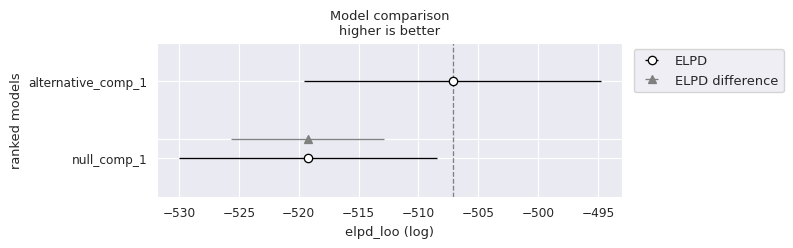

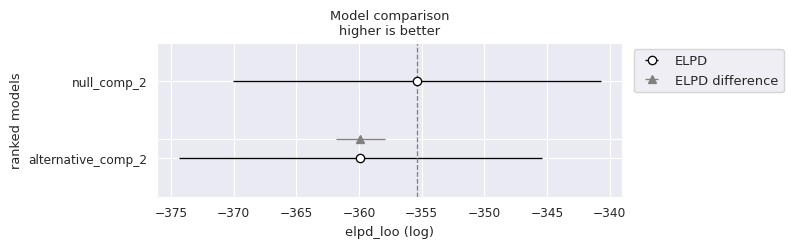

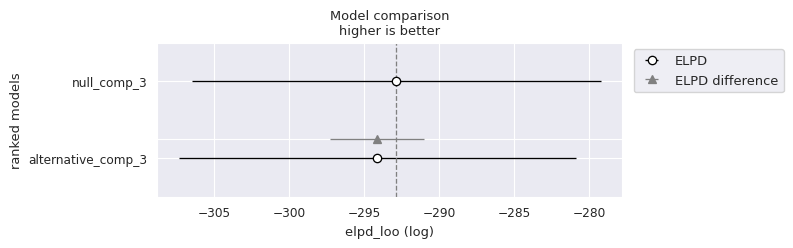

In [7]:
for component in comp:
    az_comparison = az.compare({f'null_{component}' : fitted_models['null'][component], f'alternative_{component}': fitted_models['alt'][component]})
    print(az_comparison)
    az.plot_compare(az_comparison)

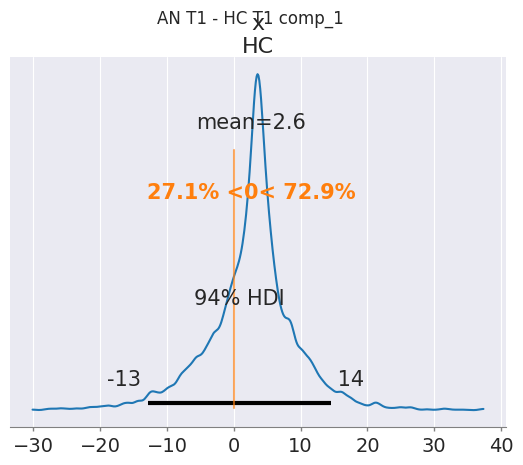

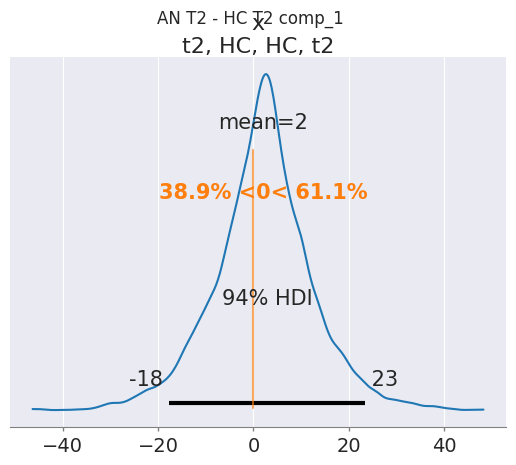

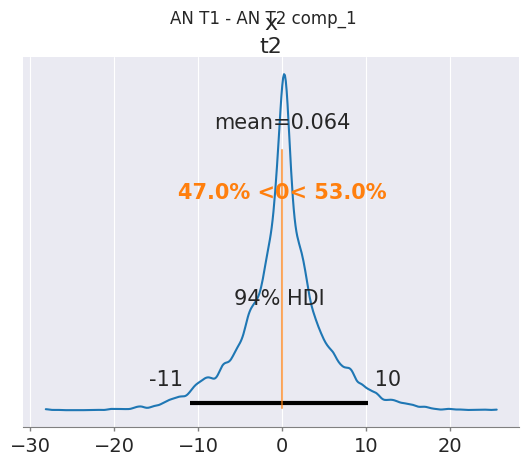

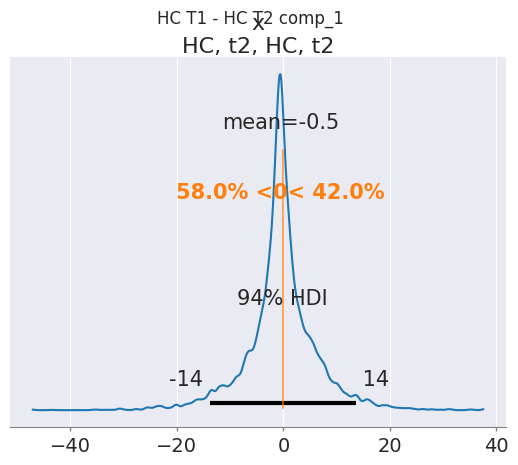

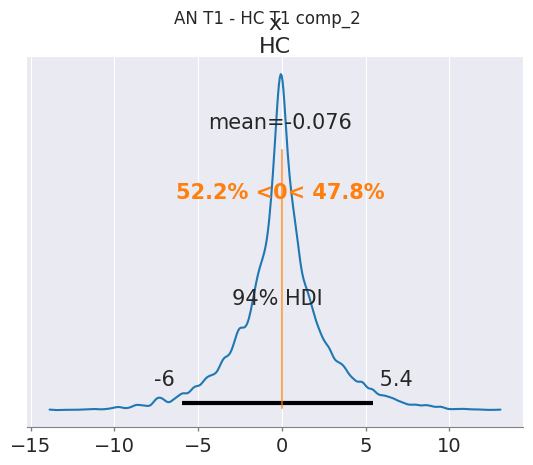

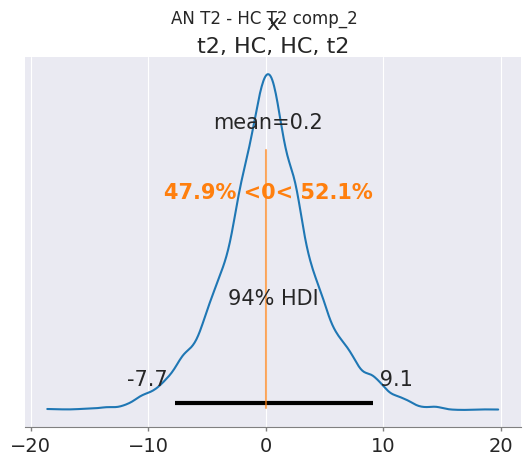

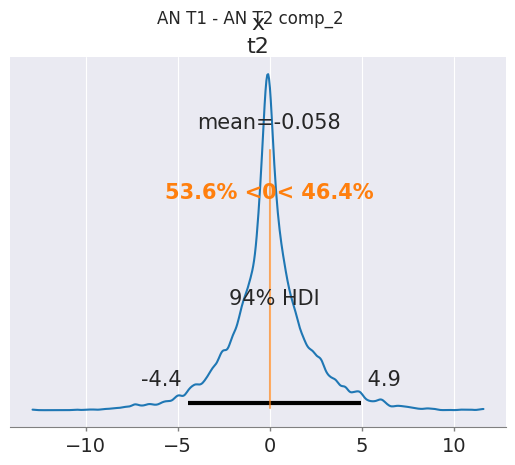

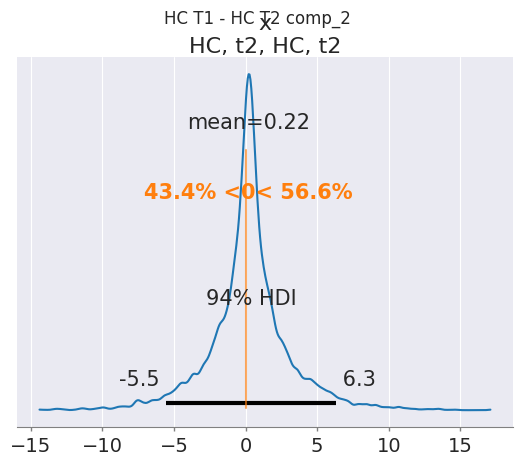

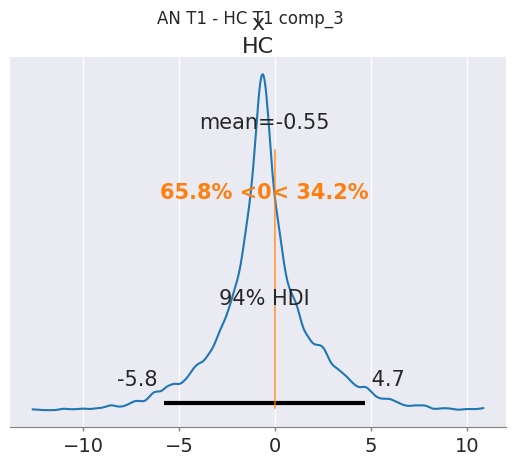

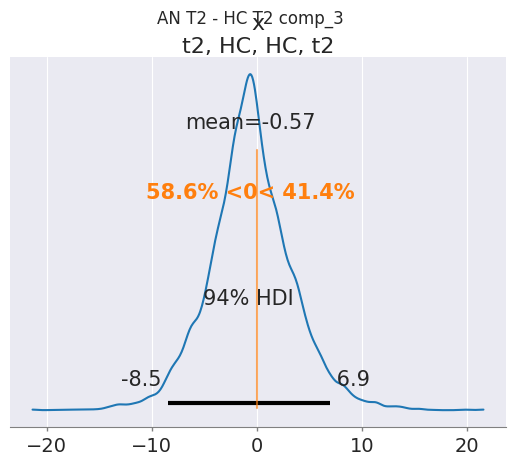

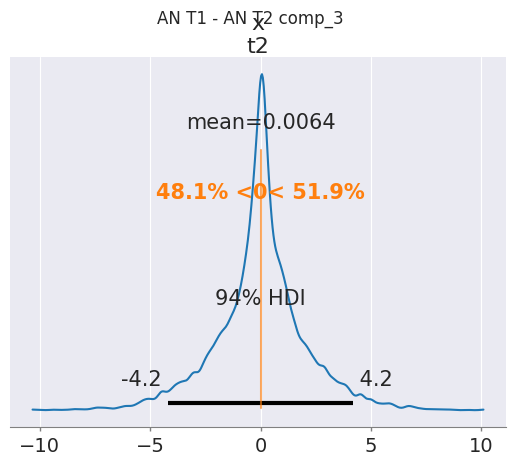

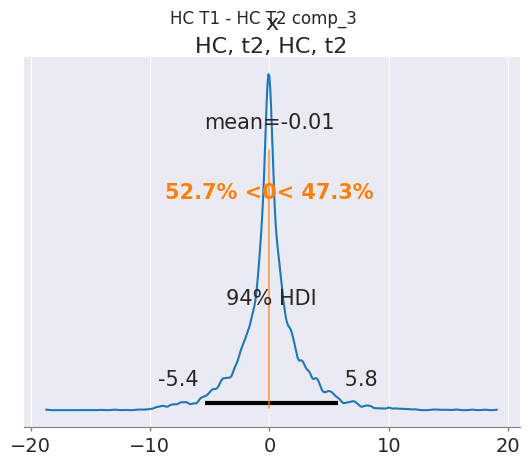

In [8]:
import arviz.labels as azl 

pred_summary = {
   'comp_1': {},
   'comp_2': {},
   'comp_3': {},
}

labeller = azl.MapLabeller(var_name_map={"Intercept": "AN_t1"})
coords = {"Intercept": "AN_t1"}

for component in comp:
   an_t1 = fitted_models['alt'][component].posterior["Intercept"]
   hc_t1 = fitted_models['alt'][component].posterior["Intercept"] + fitted_models['alt'][component].posterior["group"]
   an_t2 = fitted_models['alt'][component].posterior["Intercept"] + fitted_models['alt'][component].posterior["variable"]
   hc_t2 = fitted_models['alt'][component].posterior["Intercept"] + fitted_models['alt'][component].posterior["variable"] + fitted_models['alt'][component].posterior["group"] +  fitted_models['alt'][component].posterior["group:variable"]
   
   pred_summary[component]['an_t1'] = az.summary(an_t1, kind='stats', labeller=azl.MapLabeller(var_name_map={"Intercept": "t1[AN]"}))
   pred_summary[component]['hc_t1'] = az.summary(hc_t1, kind='stats', labeller=azl.MapLabeller(var_name_map={"x": "t1"}))
   pred_summary[component]['an_t2'] = az.summary(an_t2, kind='stats',labeller=azl.MapLabeller(var_name_map={"x": "AN"}))
   pred_summary[component]['hc_t2'] = az.summary(hc_t2, kind='stats')

   diff_t1 = an_t1 - hc_t1
   diff_t2 = an_t2 - hc_t2
   diff_an = an_t1 - an_t2
   diff_hc = hc_t1 - hc_t2

   ax_1 = az.plot_posterior(diff_t1, ref_val=0)
   fig_1 = ax_1.get_figure()
   fig_1.suptitle(f'AN T1 - HC T1 {component}')
   ax_2 = az.plot_posterior(diff_t2, ref_val=0)
   fig_2 = ax_2.get_figure()
   fig_2.suptitle(f'AN T2 - HC T2 {component}')
   ax_3 = az.plot_posterior(diff_an, ref_val=0)
   fig_3 = ax_3.get_figure()
   fig_3.suptitle(f'AN T1 - AN T2 {component}')
   ax_4 = az.plot_posterior(diff_hc, ref_val=0)
   fig_4 = ax_4.get_figure()
   fig_4.suptitle(f'HC T1 - HC T2 {component}')

In [22]:
for component in comp:
    print(component)
    print(pred_summary[component]['an_t1'],'\n' , '-' *100)
    print(pred_summary[component]['an_t2'],'\n' , '-' *100)
    print(pred_summary[component]['hc_t1'],'\n' , '-' *100)
    print(pred_summary[component]['hc_t2'],'\n' , '-' *100, '\n\n')

comp_1
         mean    sd  hdi_3%  hdi_97%
t1[AN]  1.066  0.19    0.71    1.422 
 ----------------------------------------------------------------------------------------------------
         mean    sd  hdi_3%  hdi_97%
AN[t2]  0.792  0.21   0.399     1.19 
 ----------------------------------------------------------------------------------------------------
         mean     sd  hdi_3%  hdi_97%
t1[HC] -2.491  0.294  -3.065    -1.96 
 ----------------------------------------------------------------------------------------------------
                    mean     sd  hdi_3%  hdi_97%
x[t2, HC, HC, t2] -1.845  0.324  -2.448   -1.221 
 ---------------------------------------------------------------------------------------------------- 


comp_2
         mean     sd  hdi_3%  hdi_97%
t1[AN] -0.008  0.106  -0.206    0.192 
 ----------------------------------------------------------------------------------------------------
         mean     sd  hdi_3%  hdi_97%
AN[t2]  0.072  0.113  -0.135    